# Assignment 1 - Part 2

<div class="alert alert-block alert-warning">
    Below we import <a href="https://github.com/HIPS/autograd">autograd</a>. If you get an error saying you don't have it, you will need to install it with pip, using
<pre>
pip install autograd
</pre>
</div>

In [33]:
import  autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian, grad

## Newton's Method

We want to approximate solutions of nonlinear equation in __two variables__ using Newton's method.

Newton's method is implemented below.

Implement a stopping criterion. That is, given some tolerance $TOL$, end the method when $\mathbf{x}^k:=(x_1^k,x_2^k)$ satisfies $\|F(\mathbf{x}^k)\|_2\le TOL$ or $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2\le TOL$.

Provide numerical evidence that your code works as it should by printing the values of $\|F(\mathbf{x}^k)\|_2$ for each iteration, and by making a plot of $\|F(\mathbf{x}^k)\|_2$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2$, for all $k$.

Now, verify numerically the convergence is quadratic. You will need a reference solution, and one can do this in two ways:

 - Consider a problem for which you know an exact solution, and use said solution as a reference solution,
 - or for your problem, should you not know a solution, use the method to obtain an extremely accurate result which you use as a reference solution

In [34]:
def newtonsMethod(F, x0, maxIter=50, TOL=1.0e-20):
    # Implementation of Newton's root finding method.
    # F - the function you wish to find the root for,
    # x0 - initial guess,
    # maxIter - maximum number of iterations.
    DF = jacobian(F)
    x1 = x0 #is this variable even necessary??????

    K = []
    I = []
    D = []
    S = []
    NS = []
    
    for k in range(0, maxIter):
        x0 = x1
        J = DF(x0)
        Fx = F(x0)
        x1 = x0 - np.linalg.solve(J,Fx)
        K.append(k)
        I.append(np.linalg.norm(Fx,2))
        D.append(np.linalg.norm(x1-x0,2))
        S.append(np.linalg.norm(Fx,np.inf))
        if (np.linalg.norm((x1-x0),2)<=TOL) or (np.linalg.norm(x1,2)<=TOL): break

    #Hvordan genere sekvens for å vise at den er kvadratisk konvergent?????????
    for i in range(len(S)-1):
        NS.append(S[i+1]/(S[i]**2))

    print(f"Sequence:\n{S}")
    print("\n")
    print(f"Sequence:\n{NS}")

    plt.figure()
    plt.plot(K, I)
    plt.plot(K, D)

    return x1

Sequence:
[2.0, 0.25, 0.0625, 0.015625, 0.00390625, 0.0009765625, 0.000244140625, 6.103515625e-05, 1.52587890625e-05, 3.814697265625e-06, 9.5367431640625e-07, 2.384185791015625e-07, 5.960464477539063e-08, 1.4901161193847656e-08, 3.725290298461914e-09, 9.313225746154785e-10, 2.3283064365386963e-10, 5.820766091346741e-11, 1.4551915228366852e-11, 3.637978807091713e-12, 9.094947017729282e-13, 2.2737367544323206e-13, 5.684341886080802e-14, 1.4210854715202004e-14, 3.552713678800501e-15, 8.881784197001252e-16, 2.220446049250313e-16, 5.551115123125783e-17, 1.3877787807814457e-17, 3.469446951953614e-18, 8.673617379884035e-19, 2.168404344971009e-19, 5.421010862427522e-20, 1.3552527156068805e-20, 3.3881317890172014e-21, 8.470329472543003e-22, 2.117582368135751e-22, 5.293955920339377e-23, 1.3234889800848443e-23, 3.308722450212111e-24, 8.271806125530277e-25, 2.0679515313825692e-25, 5.169878828456423e-26, 1.2924697071141057e-26, 3.2311742677852644e-27, 8.077935669463161e-28, 2.0194839173657902e-28, 

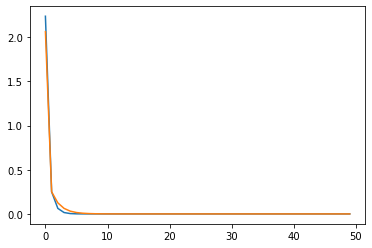

In [35]:
f = lambda v: np.array([v[0]**2,v[1]])
print(f"Zero:\n{newtonsMethod(f, np.array([1.,2.]))}")

In [ ]:
g = lambda v: np.array([v[1]+v[0]+1,v[1]-1])
print(f"Zero)

## Linear systems

Consider the linear system 
	\begin{equation*}
	A \mathbf{u} = \mathbf{f},
	\end{equation*}
where $A$ is a finite-difference discretization of the 2D Laplacian, this is a block tridiagonal matrix, implemented in the code below, and $\mathbf{f}$ is the vector with all components equal to one.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy import linalg

# Creating the 2D laplacian matrix
nx, ny = 3, 3
N  = nx*ny
main_diag = np.ones(N)*-4.0
side_diag = np.ones(N-1)
side_diag[np.arange(1,N)%4==0] = 0
up_down_diag = np.ones(N-3)
diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
laplacian = sparse.diags(diagonals, [0, -1, 1,nx,-nx])
print(laplacian*np.eye(N))

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  1. -4.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  1.  0.  1.]
 [ 0.  0.  0.  1.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -4.]]


We will now approximate the solution of this linear system using some different iteration methods of the type 
	\begin{equation*}
		A_1 \mathbf{u}^{(k+1)} = A_2 \mathbf{u}^{(k)}+\mathbf{f},
	\end{equation*}
	where $A = A_1 - A_2$ with $|A_1|\ne0$. The way we choose the matrices $A_1$ and $A_2$ depends upon the method. We will use the following iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($A_1 = A_d$).

b) Forward Gauss-Seidel ($A_1 = A_d-A_l$).

c) Successive over relaxation ($A_1 = A_d-\omega A_l$, where you can choose the value of $\omega\in (0,1)$).

Here $A = A_d - A_l - A_u$, where

- $A_d$ is the diagonal of $A$,
- $A_l$ is $-$(strictly lower triangular part of $A$),
- $A_u$ is $-$(strictly upper triangular part of $A$).

Consider the residual vector $\mathbf{r}^k:=\mathbf{f}-A\mathbf{u}^k$. We fix $nx=ny=10$ and $N=100$. For each of the above, you should:

i) Compare the convergence of each method. Submit  a semi-log plot of the $2$-norm of the relative residual $\frac{ \|\mathbf{r}^k\|_2 }{ \| \mathbf{r}^0\|_2 }$ versus the number of iterations. Plot all the methods in the same plot for comparison.
Experiment choosing different values of $\omega$ in the SOR method, try to find a value that gives you optimal convergence for this problem.


ii) Implement a stopping criterion for the three methods as you have done for the Newton method. Record the relative time each method takes per iteration, and the rime needed to obtain a norm of the relative residual below toleances  $TOL=1e-7$ and $TOL=1e-14$. Make a table with the results for each method.

iii) Calculate the spectral radius of $A_1^{-1}A_2$ and see how that relates to convergence of the method. Make a semi-log plot for comparison. 

<div class="alert alert-block alert-info">
<b>Hint:</b> Python's 
    <pre>numpy.linalg.eigvals(A)</pre>
function returns the eigenvalues of $A$.
</div>